<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [ ]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB 

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [ ]:
# Cargar datos
data = pd.read_csv("/content/reviews_vidjew_es.csv")
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [ ]:
train, test = train_test_split(data, test_size=0.3)

In [ ]:
print(f"Tenemos {data.shape[0]} datos en total")
print(f"El conjunto de datos de entrenamiento (train) tiene: {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total
El conjunto de datos de entrenamiento (train) tiene: 700 datos.
El conjunto de datos de prueba (test) tiene 300 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [ ]:
import nltk
nltk.download('stopwords')

stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto
  
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (700, 3033)
Tamaño de X_test (prueba): (300, 3033)
Tamaño de y_train 700 y tamaño de y_test 300


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [ ]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [ ]:
y_pred_nb = nb.predict(X_test)

metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"{metrica(y_test, y_pred_nb, pos_label='video_games'):.2f}")

precision_score
0.86
recall_score
0.83
f1_score
0.84


In [ ]:
print(f"{accuracy_score(y_test, y_pred_nb):>15.2f}")

print(classification_report(y_test, y_pred_nb))
print()

           0.85
              precision    recall  f1-score   support

     jewelry       0.84      0.87      0.86       156
 video_games       0.86      0.83      0.84       144

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300




###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Naive Bayes')

<Figure size 720x720 with 0 Axes>

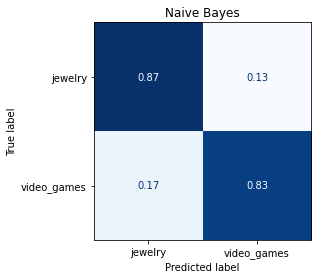

In [ ]:
confusion_matrix(y_test, y_pred_nb)
fig = plt.figure(figsize=(10,10))

plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [ ]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{548: 'compré',
 2453: 'regalo',
 1845: 'mujer',
 1356: 'gustado',
 2630: 'siento',
 2081: 'perfecto',
 351: 'cambiar',
 523: 'componentes',
 1860: 'móviles',
 585: 'consolas',
 2833: 'torx',
 2864: 'tres',
 2308: 'puntas',
 2905: 'utilizado',
 266: 'batería',
 1517: 'iphone',
 294: 'bonitos',
 1736: 'mejor',
 346: 'calidad',
 1098: 'esperaba',
 1641: 'llevo',
 954: 'días',
 996: 'encantan',
 592: 'contenta',
 524: 'compra',
 595: 'contentos',
 1991: 'paquete',
 1500: 'intacto',
 2079: 'perfectamente',
 977: 'embalado',
 2585: 'satisfechos',
 2205: 'precio',
 2248: 'producto',
 155: 'anillo',
 1351: 'guay',
 2166: 'pone',
 732: 'dedo',
 1878: 'negro',
 847: 'dia',
 2636: 'siguiente',
 2176: 'ponertelo',
 1496: 'instrucciones',
 489: 'colores',
 263: 'basura',
 273: 'bien',
 1151: 'excepto',
 472: 'codigos',
 366: 'canjearlo',
 641: 'creo',
 1352: 'guia',
 866: 'digital',
 1680: 'mal',
 103: 'ajusta',
 2330: 'quedan',
 177: 'aperturas',
 746: 'delante',
 1571: 'lados',
 830: 'detrás',
 

In [ ]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][:10]

[('porfavor', -8.35),
 ('sujeciones', -8.35),
 ('diadema', -8.35),
 ('diariamente', -8.35),
 ('diario', -8.35),
 ('sufrido', -8.35),
 ('dicha', -8.35),
 ('diciendo', -8.35),
 ('misión', -8.35),
 ('mirar', -8.35)]

In [ ]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][-10:]

[('solo', -6.5),
 ('jugar', -6.5),
 ('mando', -6.45),
 ('si', -6.32),
 ('buen', -6.3),
 ('precio', -6.27),
 ('producto', -6.12),
 ('perfecto', -6.11),
 ('bien', -5.86),
 ('juego', -5.52)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

El modelo funciona bien, tiene unas métricas aceptables, aunque considero que se podría mejorar con algunos parámetros adicionales